In [1]:
#pull all 12 months data
#using FordGO from the SF Bay area and includes 5 cities
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import zipfile, urllib.request, shutil
import pandas as pd
import glob
import citipy
import csv
import os
import openweathermapy
from uszipcode import Zipcode
import seaborn as sns
import numpy as np
from datetime import datetime
import time
import datetime

#search=SearchEngine(simple_zipcode=False)

In [3]:
#id the folder that has all the zip files
#create a glob for the path and file names
#create a empty list for holding everything 
path=r'C:\Users\Gogster\Documents\GitHub\RawData'
allfiles=glob.glob(path+"/*.zip")

data_list=[]


In [4]:
#list comprehend through the folder with all the zip files
#append to the dataframe merging all the months

for z_file in allfiles:
    df=pd.read_csv(z_file, compression='zip',header=0,sep=',',quotechar='"')
    data_list.append(df)

all_frame=pd.concat(data_list,axis=0,ignore_index=True)    

In [5]:
all_frame.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


In [6]:
all_frame.shape
#this is all the rows 1.863721M by 16

(1863721, 16)

In [7]:
#create 2 new rows 1 for the zip code and one for the city name
#city 
all_frame.insert(loc=7, column='city', value='abc')
#zip codes
all_frame.insert(loc=8, column='zip_code', value='123456')
#age in years of users
all_frame.insert(loc=16, column='age', value ='99')

In [8]:
#remove rows which have Nan values
drop_frame= all_frame.dropna(axis=0,how='any',inplace=False)
#delete extra columns in the data that are not relavent
drop_frame.drop(['bike_share_for_all_trip'],axis = 1, inplace = True)
#display the dataframe
drop_frame.head(5)

/anaconda3/envs/wk4data/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,abc,123456,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,99,Female
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,abc,123456,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,99,Male
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,abc,123456,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,99,Male
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,abc,123456,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,99,Male
5,281,2018-03-31 23:58:07.8050,2018-04-01 00:02:49.3590,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,abc,123456,200.0,2nd Ave at E 18th St,37.800214,-122.253810,777,Subscriber,1991.0,99,Male


In [9]:
drop_frame.shape
# 1.741556 M and 18 col

(1741556, 18)

In [10]:
clean_df=pd.DataFrame(drop_frame)

In [11]:
#change starttime column to pandas datetime
clean_df['start_time']=pd.to_datetime(clean_df['start_time'])
#add a column for Month
clean_df['month'] = clean_df['start_time'].dt.month
#use groupby to find the number of rides per month
total_rides_month = clean_df.groupby('month').start_time.count()
total_rides_month

month
1      86963
2      98626
3     102347
4     121791
5     167376
6     181405
7     183694
8     178375
9     174768
10    191485
11    128564
12    126162
Name: start_time, dtype: int64

In [12]:
# subset the clean_df for female, male and other
female_df=clean_df.loc[clean_df['member_gender'] == 'Female']
male_df=clean_df.loc[clean_df['member_gender'] == 'Male']
other_df=clean_df.loc[clean_df['member_gender'] == 'Other']
# find the total numbers of rides  per month for each gender group
total_rides_fmonth = female_df.groupby('month').start_time.count()
total_rides_mmonth = male_df.groupby('month').start_time.count()
total_rides_omonth = other_df.groupby('month').start_time.count()

<IPython.core.display.Javascript object>


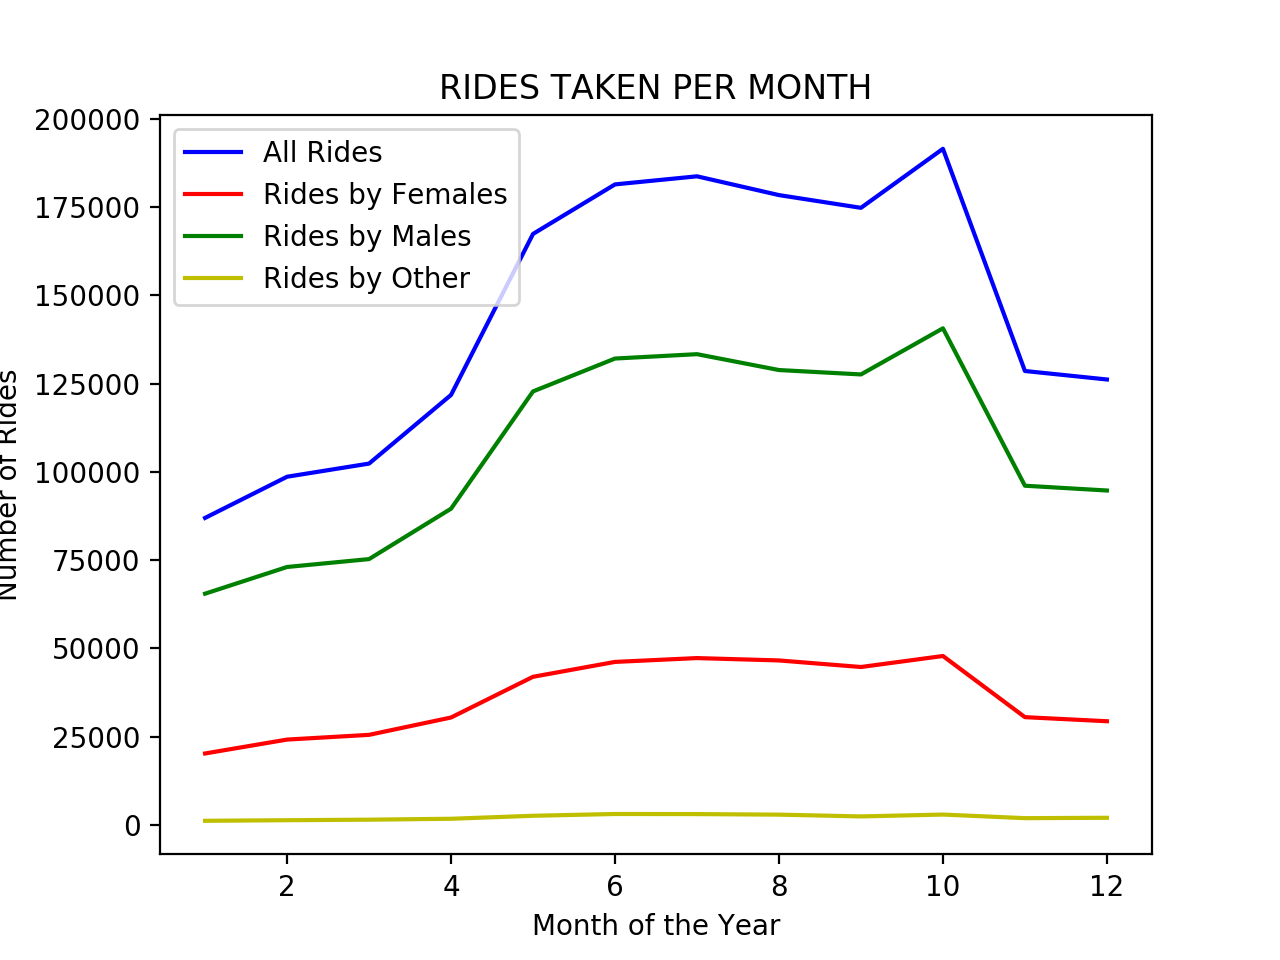

In [13]:
#plot the graph for "RIDES TAKEN PER MONTH"
plt.plot(total_rides_month,'b', label = "All Rides")
plt.plot(total_rides_fmonth,'r', label = "Rides by Females")
plt.plot(total_rides_mmonth,'g', label = "Rides by Males")
plt.plot(total_rides_omonth,'y', label = "Rides by Other")
plt.legend()

In [14]:
#add titles for axis and a chart name
plt.title('RIDES TAKEN PER MONTH')
plt.xlabel("Month of the Year")
plt.ylabel("Number of Rides")


Text(0,0.5,'Number of Rides')